## import math

### LOAD AND SORT NAMES OF COLUMNS
dd = pd.read_csv('./Mulran_generalization_2021-07-24_12:35_errors.txt', sep=r' ', header=0)
print(dd)
print(dd["Rot.err.(deg/100m)"])
dd = dd.rename(columns={'length': 'Path length',})
dd = dd.rename(columns={'Rot.err.(deg/100m)': 'Rotation error (deg/100m)',})
dd = dd.rename(columns={'Trans.err.(%)': 'Translation errror (%) [m/m]',})
#df['Rot.err.(deg/100m)'] = df['Rot.err.(deg/100m)'].apply(lambda x: x*180.0/math.pi*100)
dd['Rotation error (deg/100m)'] = dd['Rotation error (deg/100m)']*180/math.pi*100
dd['Translation errror (%) [m/m]'] = dd['Translation errror (%) [m/m]']*100

ax1=sns.lineplot(data=dd, x="Path length", y="Rotation error (deg/100m)", color='red',label = 'Rotation error (deg/100m)', legend=False)
#plt.legend(loc='upper center')
#sns_plot.tick_params(axis='y', labelcolor='red')
#sns_plot = sns.pointplot(x="Path length", y="Rot.err.(deg/100m)", data=dd, legend_out=False,palette=sns.color_palette(["#FF0000"]),linestyles=["-", "--"])
ax2 = ax1.twinx()
sns.lineplot(data=dd, x="Path length", y="Translation errror (%) [m/m]", color='blue',label = 'Translation errror (%) [m/m]',legend=False,ax=ax2)
#ax2.tick_params(axis='y', labelcolor='blue')
ax1.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
ax2.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
#plt.legend(loc='upper right')
#p=[ax1, ax2]
#sns_plot.legend(p, [p_.get_label() for p_ in p],
#loc= 'center', fontsize= 'small')


#sns_plot = sns.pointplot(x="Path length", y="Trans.err.(%)", kind="box", dodge=True, data=dd, legend_out=False, par=p)
#sns_plot.legend(loc='upper right', ncol=1)
plt.title('Error vs path distance')
plt.xlim(100,800)
plt.grid()
plt.show()
ax1.figure.savefig('demo-file.pdf')

#ax1.savefig('./output/Transl_error_submap_keyframes.eps', format='eps')
#ax1.savefig('./output/Transl_error_submap_keyframes.png', format='png', dpi=1500)





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype
import glob





base_dir='/media/daniel/m2_ssd/BAG_LOCATION/oxford-eval-sequences/eval/multi_2022-02-16_1652/'
#method_dir='oxford-cfear3-p2l_2022-02-15_1651/oxford-cfear3-p2l_2022-02-15_1651_eval.csv'
search_string="/*/*.csv"
dfs = []
for filename in glob.glob(base_dir+search_string, recursive=True):
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True)
#print(df)
df['sequence'] = df.apply (lambda row: str(row["sequence"])[8:-20], axis=1)
      

/media/daniel/m2_ssd/BAG_LOCATION/oxford-eval-sequences/eval/multi_2022-02-16_1652/oxford-cfear2_2022-02-16_1654/oxford-cfear2_2022-02-16_1654_eval.csv
/media/daniel/m2_ssd/BAG_LOCATION/oxford-eval-sequences/eval/multi_2022-02-16_1652/oxford-cfear1_2022-02-16_1652/oxford-cfear1_2022-02-16_1652_eval.csv


0     10-12-32
1     16-13-09
2     10-11-46
3     18-15-20
4     10-11-46
5     18-15-20
6     17-13-26
7     16-13-09
8     10-12-32
9     18-14-14
10    18-14-46
11    16-11-53
12    18-14-14
13    16-11-53
14    17-13-26
15    18-14-46
16    10-12-32
17    16-13-09
18    17-13-26
19    16-13-09
20    10-12-32
21    18-14-14
22    18-14-14
23    17-13-26
Name: sequence, dtype: object


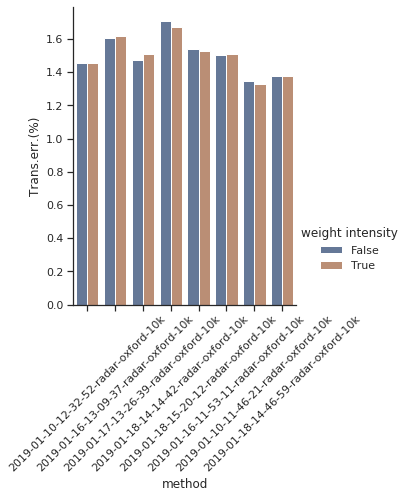

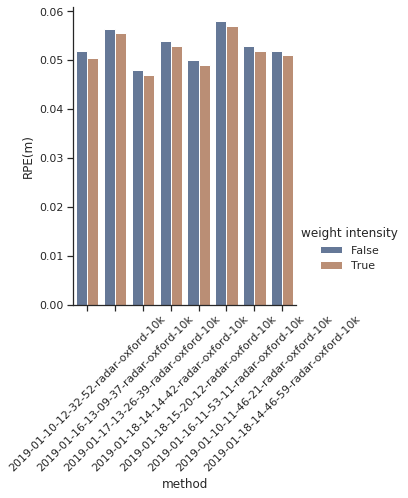

In [2]:
             
                   
#path=base_dir+method_dir

#path="./oxford-cfear1_2021-09-22_18:18_eval.csv"
#path="./oxford-cfear2_2021-09-22_18:20_eval.csv"
#path="./oxford-cfear3_2021-09-22_18:22_eval.csv"
#path="./mulran_cfear-1_2021-09-22_18:32_eval.csv"
#path="./mulran_cfear-2_2021-09-22_18:33_eval.csv"
#path="./mulran_cfear-3_2021-09-22_18:34_eval.csv"




sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")

#### UNCOMMENT FOR MULRAN ####
#cat_size_order = CategoricalDtype(
#    [' KAIST01',' KAIST02',' KAIST03',' DCC01',' DCC02',' DCC03',' Riverside01',' Riverside02',' Riverside03'], 
#    ordered=True
#)
##############################

#print(df['sequence'])
#### UNCOMMENT FOR OXFORD ####
#cat_size_order = CategoricalDtype(
#    ["2019-01-10-12-32-52-radar-oxford-10k", "2019-01-16-13-09-37-radar-oxford-10k", "2019-01-17-13-26-39-radar-oxford-10k", "2019-01-18-14-14-42-radar-oxford-10k", "2019-01-18-15-20-12-radar-oxford-10k", "2019-01-16-11-53-11-radar-oxford-10k", "2019-01-10-11-46-21-radar-oxford-10k","2019-01-18-14-46-59-radar-oxford-10k"], 
#    ordered=True
cat_size_order = CategoricalDtype(
    ["10-12-32", "16-13-09", "17-13-26", "18-14-14", "18-15-20", "16-11-53", "10-11-46","18-14-46"], 
    ordered=True
)
##############################

df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')
#print(df["Trans.err.(%)"])
#print(df)
df['setting'] = df.apply (lambda row: "after", axis=1)
df['for_copy'] = df.apply (lambda row: str(row["Trans.err.(%)"])+"/"+str(row["Rot.err.(deg/100m)"]), axis=1)
df['for_copy_ATE'] = df.apply (lambda row: str(row["RPE(m)"])+"/"+str(row["ATE(m)"]), axis=1)
df = df.rename(columns={'resolution r': 'resolution r [m]'})

g = sns.catplot(x="method", y="Trans.err.(%)",hue="weight intensity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)


g = sns.catplot(x="method", y="RPE(m)",hue="weight intensity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)

#sns.scatterplot(data=df, x="sequence", y="Trans.err.(%)", hue="setting")
#plt.xticks(rotation=45)
#print("Trans.err.(%)"+str(df["Trans.err.(%)"].mean()))
#print("Rot.err.(deg/100m)"+str(df["Rot.err.(deg/100m)"].mean()))
#print("RPE [m]"+str(df["RPE(m)"].mean()))
#print("ATE [m]"+str(df["ATE(m)"].mean()))
##print("Sequences: ") 
##print(df["sequence"].values)
##print("Trans.err.(%) "+str(df["Trans.err. [%]"].values))
##print(df["for_copy"].values)
##print("RPE/ATE")
##print(df["for_copy_ATE"].values)
#print(df["for_copy"].transpose().to_latex(index=False))
##print(df["Rot.err.(deg/100m)"])
##print(df["sequence"].to_numpy())